In this workbook we load the Stack Overflow suveys from 2017, 2018 and 2019.
These can be downloaded from https://insights.stackoverflow.com/survey/

In [1]:
%matplotlib inline 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

# First read the surveys rename the columns and store it in one large dataframe. 
df_2017 = pd.read_csv('2017 survey_results_public.csv', 
                      usecols =['Country',            # Where do you live
                                'EmploymentStatus',   # And only fulltime for good reference
                                'FormalEducation',    # Formal education 
                                'YearsCodedJob',      # Yeas coding experiance
                                'HaveWorkedLanguage', # Languages wored with
                                'Salary'              # Salary, converted to USD
                                ])

df_2017.rename(columns={ 'Country'            : 'Country',
                         'EmploymentStatus'   : 'Employment',
                         'FormalEducation'    : 'Education',
                         'YearsCodedJob'      : 'YearsCodedJob',
                         'HaveWorkedLanguage' : 'Languages',
                         'Salary'             : 'Salary'   
                       }, inplace=True)
df_2017['Year'] = 2017

df_2018 = pd.read_csv('2018 survey_results_public.csv', 
                      usecols =['Country',  
                                'Employment',  
                                'FormalEducation',
                                'YearsCodingProf',  
                                'LanguageWorkedWith', 
                                'ConvertedSalary'  
                                ])

df_2018.rename(columns={'Country'            : 'Country',
                        'Employment'         : 'Employment',
                        'FormalEducation'    : 'Education',
                        'YearsCodingProf'    : 'YearsCodedJob',
                        'LanguageWorkedWith' : 'Languages',
                        'ConvertedSalary'    : 'Salary'   
                   }, inplace=True)
df_2018['Year'] = 2018

df_2019 = pd.read_csv('2019 survey_results_public.csv', 
                      usecols =['Country', 
                                'Employment', 
                                'EdLevel', 
                                'YearsCodePro', 
                                'LanguageWorkedWith', 
                                'ConvertedComp'
                                ])

df_2019.rename(columns={'Country'            : 'Country',
                        'Employment'         : 'Employment',
                        'EdLevel'            : 'Education',
                        'YearsCodePro'       : 'YearsCodedJob',
                        'LanguageWorkedWith' : 'Languages',
                        'ConvertedComp'      : 'Salary'   
                       }, inplace=True)
df_2019['Year'] = 2019

# Make one large dataframe with all three surveys
df = pd.concat([df_2017,df_2018,df_2019],ignore_index=True)

# Delete the unused dataframes to free some memory
del df_2017
del df_2018
del df_2019

# As an extra, calculate the number of programming languages per entry
# Count the number of Programming Languages per entry
df['Number_of_languages'] = df['Languages'].str.split(';').str.len()

print ( "%s rows imported" % df.shape[0])

C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:64: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



239130 rows imported


## Harmonizing Programming languages

In [2]:
# For some smaller languages and HTML was no option to choose in all three years. 
# Delete them from te data, to make fair compair
# Also 2018 had an extra space after the semicolon, remove the extra space
for search in ["HTML", "CSS", "Bash", "PowerShell", "Shell", "/", " ", "Other(s):", 
               "DelphiObjectPascal", "Dart", "Elixir", "WebAssembly", "Cobol", 
               "Julia", "Ocaml", "Hack", "Smalltalk", "CommonLisp", "Haskell", 
               "Perl", "Groovy", "VisualBasic6", "CoffeeScript", "Lua", ] :
    df["Languages"] = df["Languages"].str.replace(search, "", regex=False)
    
# Delete duble semicolons
for _ in range(0,4) :
    df["Languages"] = df["Languages"].str.replace(';;', ';')

# Delete semicolons at the start of end
df.loc[df["Languages"].str[0]==";", "Languages"] = df["Languages"][df["Languages"].str[0]==";"].str[1:] 
df.loc[df["Languages"].str[-1]==";", "Languages"] = df["Languages"][df["Languages"].str[-1]==";"].str[:-1] 

# And if no languages are left, make NaN value
df["Languages"] = df["Languages"].replace('', np.nan)

# Calculate the number of programming languages per entry
# Count the number of Programming Languages per entry
df['Number_of_languages'] = df['Languages'].str.split(';').dropna()
df['Number_of_languages'] = df['Number_of_languages'].str.len()
print ("Average number of programming languages per user in :")
print ("- 2017 : %.2f " % df[df['Year']==2017]['Number_of_languages'].mean() )
print ("- 2018 : %.2f " % df[df['Year']==2018]['Number_of_languages'].mean() )
print ("- 2019 : %.2f " % df[df['Year']==2019]['Number_of_languages'].mean() )

Average number of programming languages per user in :
- 2017 : 3.58 
- 2018 : 4.22 
- 2019 : 3.92 


## Harmonizing education

| Translation | 2017 | 2018 | 2019 |
| --- | --- | --- |
|None|I never completed any formal education|I never completed any formal education|I never completed any formal education|
|Primary|Primary/elementary school|Primary/elementary school|Primary/elementary school|
|Secondary|Secondary school|Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)|Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)|
|Nachelor|Bachelor's degree|Bachelor’s degree (BA, BS, B.Eng., etc.)|Bachelor’s degree (BA, BS, B.Eng., etc.)|
|Master|Master's degree|Master’s degree (MA, MS, M.Eng., MBA, etc.)|Master’s degree (MA, MS, M.Eng., MBA, etc.)|
|Professional|Professional degree|Professional degree (JD, MD, etc.)|Professional degree (JD, MD, etc.)|
|Doctoral|Doctoral degree|Other doctoral degree (Ph.D, Ed.D., etc.)|Other doctoral degree (Ph.D, Ed.D., etc.)|
|Associate||Associate degree|Associate degree|
|Non finished|Some college/university study without earning a bachelor's degree|Some college/university study without earning a degree|Some college/university study without earning a degree|
|NaN|I prefer not to answer|||


In [3]:
DictionaryEducation = {'Associate degree'                       : 'Associate' ,
                       'I never completed any formal education' : 'None',
                       'Doctoral degree'                        :  'Doctoral' ,
                       'Primary/elementary school'              : 'Primary',
                       'Secondary school'                       : 'Secondary',
                       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)' :  'Secondary',
                       'Bachelor\'s degree'                     : 'Bachelor' ,
                       'Bachelor’s degree (BA, BS, B.Eng., etc.)' : 'Bachelor',
                       'Master\'s degree'           : 'Master',
                       'Master’s degree (MA, MS, M.Eng., MBA, etc.)' : 'Master',
                       'Professional degree'        : 'Professional' ,
                       'Professional degree (JD, MD, etc.)' : 'Professional' ,
                       'Other doctoral degree (Ph.D, Ed.D., etc.)' : 'Doctoral' ,
                       'Some college/university study without earning a bachelor\'s degree' : 'Non finished',
                       'Some college/university study without earning a degree' :  'Non finished',
                       'I prefer not to answer' : np.nan      # Not answering is actualy the same as NaN
                      }


df["Education"].replace(DictionaryEducation, inplace=True)


## Harmonizing Job experiance

In [4]:
DictionaryYearsJob = { 'Less than a year' : '00-02 years' ,
                       '1 to 2 years' : '00-02 years',
                       '2 to 3 years' : '00-02 years',
                       '3 to 4 years' : '03-05 years',
                       '4 to 5 years' : '03-05 years',
                       '5 to 6 years' : '03-05 years',
                       '6 to 7 years' : '06-08 years',
                       '7 to 8 years' : '06-08 years',
                       '8 to 9 years' : '06-08 years',
                       '9 to 10 years' : '09-11 years',
                       '10 to 11 years' : '09-11 years',
                       '11 to 12 years' : '09-11 years',
                       '12 to 13 years' : '12-14 years',
                       '13 to 14 years' : '12-14 years',
                       '14 to 15 years' : '12-14 years',
                       '15 to 16 years' : '15-17 years',
                       '16 to 17 years' : '15-17 years',
                       '17 to 18 years' : '15-17 years',
                       '18 to 19 years' : '18-20 years',
                       '19 to 20 years' : '18-20 years',
                       '21-23 years' : '20 or more years',
                       '24-26 years' : '20 or more years',
                       '27-29 years' : '20 or more years',
                       '30 or more years' : '20 or more years',
                       'Less than 1 year': '00-02 years',
                       '1' : '00-02 years', '2' : '00-02 years',
                       '3' : '03-05 years', '4' : '03-05 years', '5' : '03-05 years',
                       '6' : '06-08 years', '7' : '06-08 years', '8' : '06-08 years',
                       '9': '09-11 years', '10': '09-11 years',
                       '11': '09-11 years',
                       '12' : '12-14 years',
                       '13' : '12-14 years',
                       '14' : '12-14 years',
                       '15' : '15-17 years',
                       '16' : '15-17 years',
                       '17' : '15-17 years',
                       '18' : '18-20 years',
                       '19' : '18-20 years',
                       '0-2 years' : '00-02 years', 
                       '3-5 years' : '03-05 years' ,
                       '6-8 years' : '06-08 years' ,
                       '9-11 years' : '09-11 years' ,
                       'More than 50 years' : '20 or more years',
                      
                    }

df["YearsCodedJob"].replace(DictionaryYearsJob, inplace=True)

#And all values from 20 are one catagory
df.loc[ pd.to_numeric(df['YearsCodedJob'], errors='coerce')>=20, "YearsCodedJob"] =  '20 or more years'



## Harmonize Country

In [5]:
DictionaryCountry = {'Iran, Islamic Republic of...':'Iran' ,
                     'Vietnam': 'Viet Nam',
                     'I prefer not to say' : np.nan ,
                     'Other Country (Not Listed Above)' : 'Other',
                     'Venezuela, Bolivarian Republic of...' : 'Venezuela',
                     'Hong Kong (S.A.R.)' : 'Hong Kong',
                     'The former Yugoslav Republic of Macedonia' : 'Macedonia',
                     'Bosnia-Herzegovina' : 'Bosnia and Herzegovina',
                     'Republic of Korea' : 'South Korea',
                     'Slovak Republic' : 'Slovakia',
                     'Azerbaidjan' : 'Azerbaijan',
                     'Libyan Arab Jamahiriya' : 'Libya',
                     'Republic of Moldova' : 'Moldavia',
                     'Syrian Arab Republic' : 'Syria',
                     'United Republic of Tanzania' : 'Tanzania'
                    }

df["Country"].replace(DictionaryCountry, inplace=True)

# Now answer the questions

In [6]:
# And make now a table from all countries
df_country = df.pivot_table( index='Country', columns='Year', aggfunc=len, fill_value=0, values ='YearsCodedJob').reset_index()

df_country['Total'] = df_country[2017]+df_country[2018]+df_country[2019]
df_country['2017_perc'] = (df_country[2017]/df_country[2017].sum())*100
df_country['2018_perc'] = (df_country[2018]/df_country[2018].sum())*100
df_country['2019_perc'] = (df_country[2019]/df_country[2019].sum())*100
df_country = df_country.sort_values('Total', ascending=False)

# Increase the number of rows displayed, to see all countries
pd.set_option('display.max_rows', 500)
df_country

Year,Country,2017,2018,2019,Total,2017_perc,2018_perc,2019_perc
216,United States,11455,20309,20949,52713,22.350347,20.630212,23.604241
92,India,5197,13721,9061,27979,10.140092,13.938015,10.209462
76,Germany,4143,6459,5866,16468,8.083587,6.561157,6.609503
215,United Kingdom,4395,6221,5737,16353,8.575275,6.319393,6.464153
38,Canada,2233,3393,3395,9021,4.356903,3.446665,3.825309
71,France,1740,2572,2391,6703,3.394989,2.612679,2.694054
169,Russian Federation,873,2869,1694,5436,1.703348,2.914377,1.908711
162,Poland,1290,2122,1922,5334,2.516975,2.155562,2.165609
30,Brazil,777,2505,1948,5230,1.516038,2.544620,2.194905
13,Australia,913,2018,1903,4834,1.781394,2.049917,2.144201


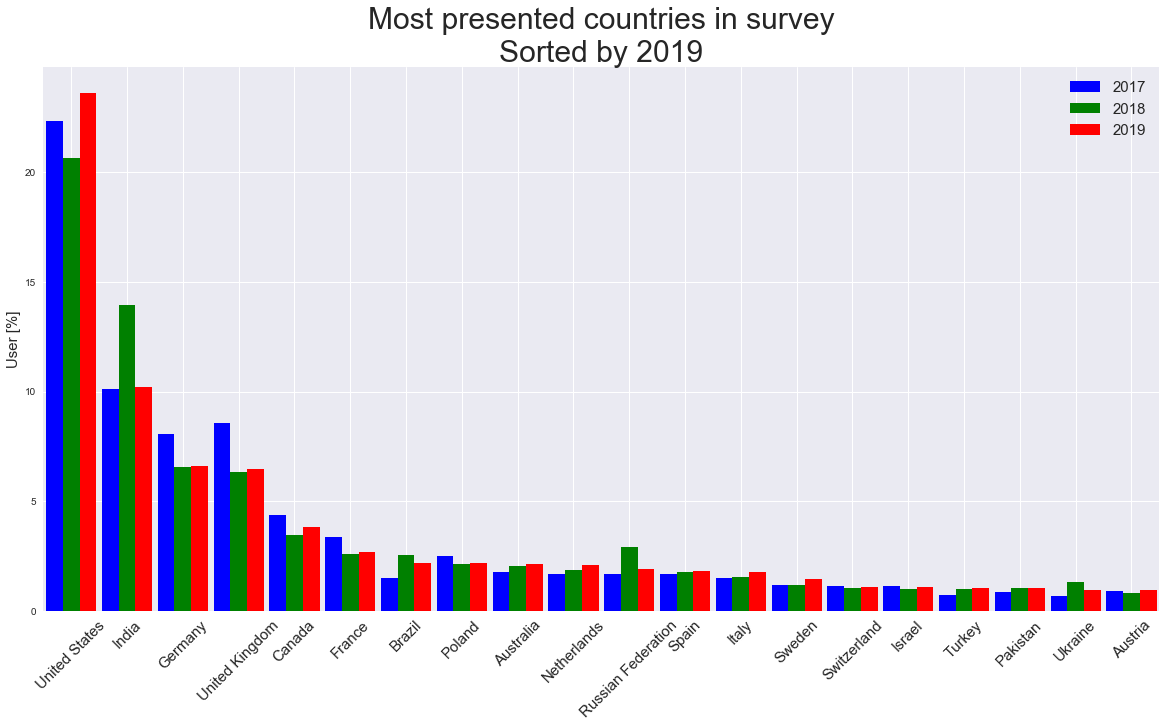

In [7]:
fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.3
df_country_graph = df_country.sort_values('2019_perc', ascending=False)[:20]
index = np.arange(df_country_graph.shape[0])

plt.bar(index - bar_width, 
        df_country_graph['2017_perc'], 
        bar_width,
        color='b',
        label='2017')

plt.bar(index , 
        df_country_graph['2018_perc'], 
        bar_width,
        color='g',
        label='2018')

plt.bar(index + bar_width, 
        df_country_graph['2019_perc'], 
        bar_width,
        color='r',
        label='2019')

plt.xticks(index, df_country_graph['Country'],fontsize=15, rotation=45)
plt.ylabel('User [%]',fontsize=15)
plt.title('Most presented countries in survey\nSorted by 2019',fontsize=30)
plt.xlim(xmin=-.5, xmax=df_country_graph.shape[0]-.5)
plt.legend(fontsize=15)
plt.show()

## Work experience

In [8]:
df_yearscoded = df.pivot_table( index='YearsCodedJob', columns='Year', aggfunc=len, fill_value=1, values ='Country').reset_index()
df_yearscoded.index=df_yearscoded['YearsCodedJob']
df_yearscoded['2017_perc'] = (df_yearscoded[2017]/df_yearscoded[2017].sum())*100
df_yearscoded['2018_perc'] = (df_yearscoded[2018]/df_yearscoded[2018].sum())*100
df_yearscoded['2019_perc'] = (df_yearscoded[2019]/df_yearscoded[2019].sum())*100

df_yearscoded

Year,YearsCodedJob,2017,2018,2019,2017_perc,2018_perc,2019_perc
YearsCodedJob,,,,,,,
00-02 years,00-02 years,13090,23421,16405,32.012717,30.064311,22.070200
03-05 years,03-05 years,10398,21362,20515,25.429200,27.421280,27.599521
06-08 years,06-08 years,4837,11385,11629,11.829298,14.614328,15.644886
09-11 years,09-11 years,4472,7573,8009,10.936659,9.721063,10.774778
12-14 years,12-14 years,2112,4287,4750,5.165077,5.502997,6.390335
15-17 years,15-17 years,2084,3012,3541,5.096601,3.866347,4.763827
18-20 years,18-20 years,830,2830,1942,2.029836,3.632723,2.612638
20 or more years,20 or more years,3067,4033,7540,7.500611,5.176951,10.143816


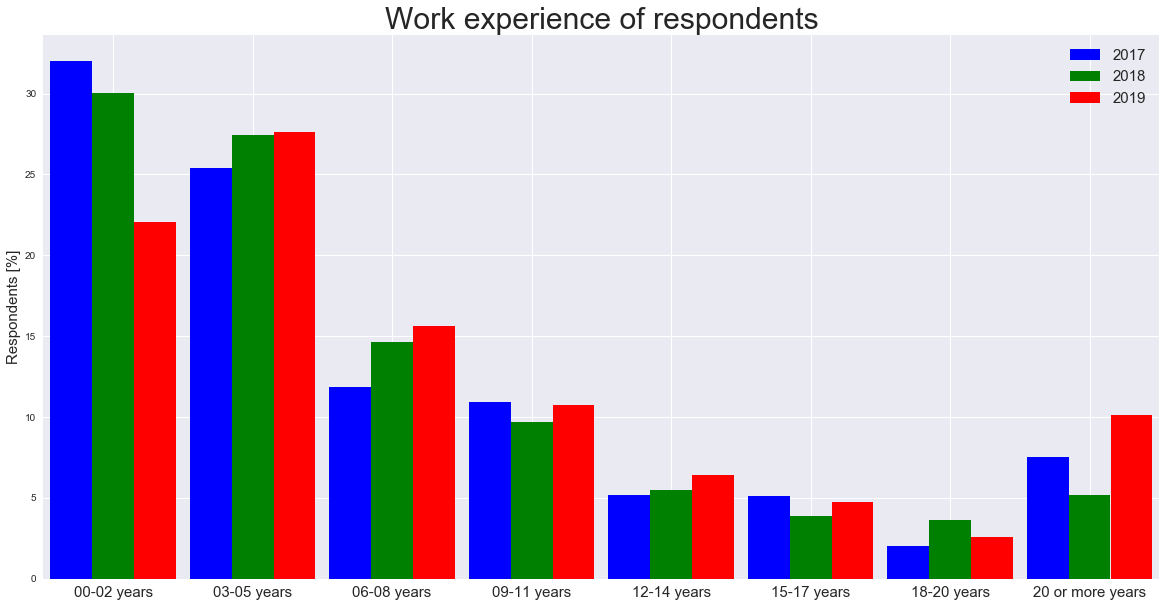

In [9]:
fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.3
index = np.arange(df_yearscoded.shape[0])

plt.bar(index - bar_width, df_yearscoded['2017_perc'], bar_width, color='b', label='2017')
plt.bar(index , df_yearscoded['2018_perc'], bar_width, color='g', label='2018')
plt.bar(index + bar_width, df_yearscoded['2019_perc'], bar_width, color='r',label='2019')

plt.xticks(index, df_yearscoded['YearsCodedJob'],fontsize=15)
plt.xlim(xmin=-.5, xmax=7.5)
plt.ylabel('Respondents [%]',fontsize=15)
plt.title('Work experience of respondents',fontsize=30)
plt.legend(fontsize=15)
plt.show()

## Programming languages

In [10]:
# Make the dataframe Lang_total with the count of used programming languages
df_lang = df[['Languages', 'Year']].dropna()
df_lang = pd.concat([pd.Series(row['Year'], row['Languages'].split(';'))              
                    for _, row in df_lang.iterrows()]).reset_index()
df_lang.columns = ['Language' , 'Year']

# Make the pivot table 
# Be patiant, this may take a few minutes...
df_lang = df_lang.pivot_table(index='Language', columns='Year', values='Language', aggfunc=len, 
                                   fill_value=np.nan
                                   ).reset_index()

# Calculate the extra rows
df_lang['2017_perc'] = (df_lang[2017]/(df[df['Year']==2017].dropna(subset=['Languages']).shape[0]))*100
df_lang['2018_perc'] = (df_lang[2018]/(df[df['Year']==2018].dropna(subset=['Languages']).shape[0]))*100
df_lang['2019_perc'] = (df_lang[2019]/(df[df['Year']==2019].dropna(subset=['Languages']).shape[0]))*100

df_lang['2018_trend'] = df_lang['2018_perc'] - df_lang['2017_perc'] 
df_lang['2019_trend'] = df_lang['2019_perc'] - df_lang['2018_perc']

df_lang.fillna(value=0, inplace=True)
df_lang['Total'] = df_lang[2017]+df_lang[2018]+df_lang[2019]

df_lang.sort_values('Total', ascending=False, inplace=True)
df_lang.reset_index()
df_lang

Year,Language,2017,2018,2019,2017_perc,2018_perc,2019_perc,2018_trend,2019_trend,Total
9,JavaScript,22875.0,54686,59219.0,62.700436,70.109358,68.035753,7.408922,-2.073604,136780.0
18,SQL,18754.0,44670,47544.0,51.404764,57.268497,54.622534,5.863733,-2.645962,110968.0
8,Java,14524.0,35521,35917.0,39.810323,45.539160,41.264462,5.728837,-4.274698,85962.0
14,Python,11704.0,30359,36443.0,32.080695,38.921296,41.868774,6.840601,2.947479,78506.0
2,C#,12476.0,26954,27097.0,34.196749,34.555967,31.131306,0.359218,-3.424661,66527.0
13,PHP,10290.0,24071,23030.0,28.204917,30.859861,26.458795,2.654943,-4.401065,57391.0
3,C++,8155.0,19872,20524.0,22.352877,25.476596,23.579692,3.123720,-1.896904,48551.0
1,C,6974.0,18042,18017.0,19.115753,23.130473,20.699440,4.014720,-2.431032,43033.0
21,TypeScript,3488.0,13626,18523.0,9.560617,17.469007,21.280776,7.908390,3.811769,35637.0
16,Ruby,3324.0,7911,7331.0,9.111093,10.142178,8.422468,1.031085,-1.719710,18566.0


In [11]:
# Calculate the extra rows
df_lang['2017_perc'] = (df_lang[2017]/(df[df['Year']==2017].dropna(subset=['Languages']).shape[0]))*100
df_lang['2018_perc'] = (df_lang[2018]/(df[df['Year']==2018].dropna(subset=['Languages']).shape[0]))*100
df_lang['2019_perc'] = (df_lang[2019]/(df[df['Year']==2019].dropna(subset=['Languages']).shape[0]))*100

df_lang['2018_trend'] = df_lang['2018_perc'] - df_lang['2017_perc'] 
df_lang['2019_trend'] = df_lang['2019_perc'] - df_lang['2018_perc']

df_lang.fillna(value=0, inplace=True)
df_lang['Total'] = df_lang[2017]+df_lang[2018]+df_lang[2019]

df_lang.sort_values('Total', ascending=False, inplace=True)
df_lang.reset_index()
df_lang

Year,Language,2017,2018,2019,2017_perc,2018_perc,2019_perc,2018_trend,2019_trend,Total
9,JavaScript,22875.0,54686,59219.0,62.700436,70.109358,68.035753,7.408922,-2.073604,136780.0
18,SQL,18754.0,44670,47544.0,51.404764,57.268497,54.622534,5.863733,-2.645962,110968.0
8,Java,14524.0,35521,35917.0,39.810323,45.539160,41.264462,5.728837,-4.274698,85962.0
14,Python,11704.0,30359,36443.0,32.080695,38.921296,41.868774,6.840601,2.947479,78506.0
2,C#,12476.0,26954,27097.0,34.196749,34.555967,31.131306,0.359218,-3.424661,66527.0
13,PHP,10290.0,24071,23030.0,28.204917,30.859861,26.458795,2.654943,-4.401065,57391.0
3,C++,8155.0,19872,20524.0,22.352877,25.476596,23.579692,3.123720,-1.896904,48551.0
1,C,6974.0,18042,18017.0,19.115753,23.130473,20.699440,4.014720,-2.431032,43033.0
21,TypeScript,3488.0,13626,18523.0,9.560617,17.469007,21.280776,7.908390,3.811769,35637.0
16,Ruby,3324.0,7911,7331.0,9.111093,10.142178,8.422468,1.031085,-1.719710,18566.0


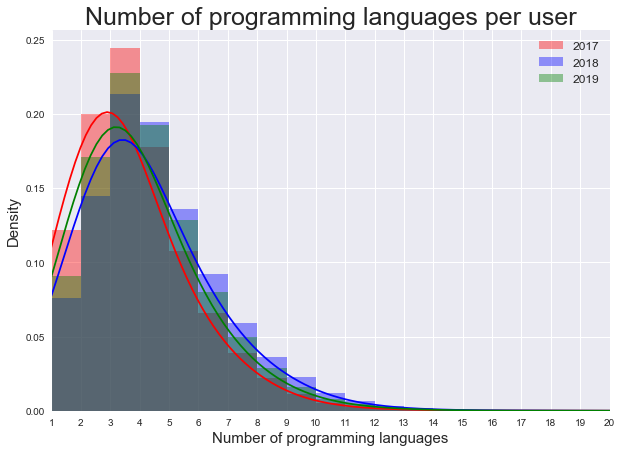

In [12]:
fig, ax = plt.subplots(figsize=(10,7))

sns.distplot(df[(df['Year']==2017)&(df['Number_of_languages'].between(1,20))]['Number_of_languages'], hist=True, kde_kws={'bw':1}, color='red',label = '2017', bins=range(0,20,1))
sns.distplot(df[(df['Year']==2018)&(df['Number_of_languages'].between(1,20))]['Number_of_languages'], hist=True, kde_kws={'bw':1}, color='blue',label = '2018', bins=range(0,20,1))
sns.distplot(df[(df['Year']==2019)&(df['Number_of_languages'].between(1,20))]['Number_of_languages'], hist=True, kde_kws={'bw':1}, color='green',label = '2019', bins=range(0,20,1))

plt.legend(prop={'size': 12})
plt.title('Number of programming languages per user',fontsize=25)
plt.xlabel('Number of programming languages',fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.xlim(xmin=1, xmax=20)
plt.xticks(range(1,21,1))
plt.show()


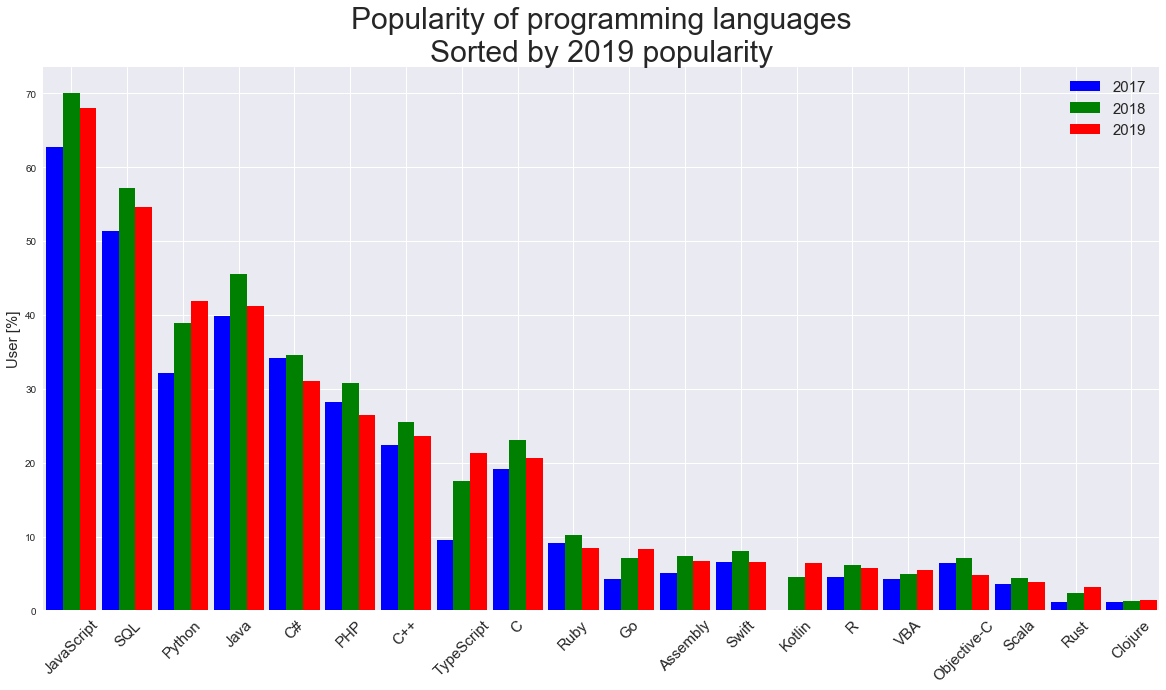

In [13]:
# Make the graph for the 20 most popular langages
Lang_total_graph = df_lang.sort_values('2019_perc', ascending=False)[:20]

sns.set()
fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.3
index = np.arange(Lang_total_graph.shape[0])

plt.bar(index - bar_width, 
        Lang_total_graph['2017_perc'], 
        bar_width,
        color='b',
        label='2017')

plt.bar(index , 
        Lang_total_graph['2018_perc'], 
        bar_width,
        color='g',
        label='2018')

plt.bar(index + bar_width, 
        Lang_total_graph['2019_perc'], 
        bar_width,
        color='r',
        label='2019')

plt.xticks(index, Lang_total_graph['Language'],fontsize=15, rotation=45)
plt.ylabel('User [%]',fontsize=15)
plt.title('Popularity of programming languages\nSorted by 2019 popularity',fontsize=30)
plt.xlim(xmin=-.5, xmax=Lang_total_graph.shape[0]-.5)
plt.legend(fontsize=15)
plt.show()

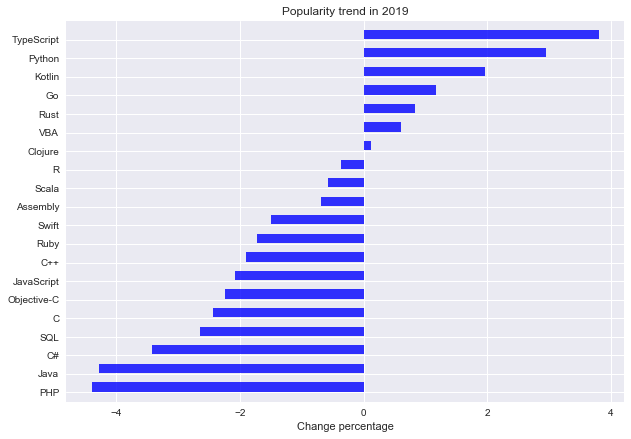

In [14]:
# Find the biggest risers and fallers of 2019
Lang_total_graph = df_lang[(df_lang['2019_trend']!=0)&(df_lang[2019]> 1000)] 
Lang_total_graph = Lang_total_graph.sort_values('2019_trend')

fig, ax = plt.subplots(figsize=(10,7))
bar_width = 0.3

index = np.arange(Lang_total_graph.shape[0])
#plt.barh(index + bar_width, Lang_total_graph['2018_trend'], .9, alpha=.8, color='g', label='2018')
plt.barh(index + bar_width, Lang_total_graph['2019_trend'], .5, alpha=.8, color='b', label='2019')

plt.yticks(index, Lang_total_graph['Language'])
plt.xlabel('Change percentage')
plt.title('Popularity trend in 2019')
plt.ylim(ymin=-.5, ymax=Lang_total_graph.shape[0])
plt.show()

## And now look at the salary

In [15]:
df_salary= df[['YearsCodedJob', 'Year', 'Salary', 'Number_of_languages']]
df_salary = df_salary.dropna(axis=0, subset=['Salary'])
# Fill the number of languages with the mode if NaN
df_salary['Number_of_languages'] = df_salary['Number_of_languages'].fillna(df_salary['Number_of_languages'].mode()[0])
df_salary['YearsCodedJob'] = df_salary['YearsCodedJob'].fillna('Unknown')
df_salary

,YearsCodedJob,Year,Salary,Number_of_languages
2,20 or more years,2017,1.137500e+05,3.0
14,20 or more years,2017,1.000000e+05,3.0
17,20 or more years,2017,1.300000e+05,7.0
18,03-05 years,2017,8.250000e+04,3.0
22,03-05 years,2017,1.007640e+05,1.0
25,15-17 years,2017,1.750000e+05,2.0
34,00-02 years,2017,1.483871e+04,2.0
36,09-11 years,2017,2.820000e+04,4.0
37,06-08 years,2017,1.182796e+05,3.0
52,00-02 years,2017,1.567420e+04,4.0


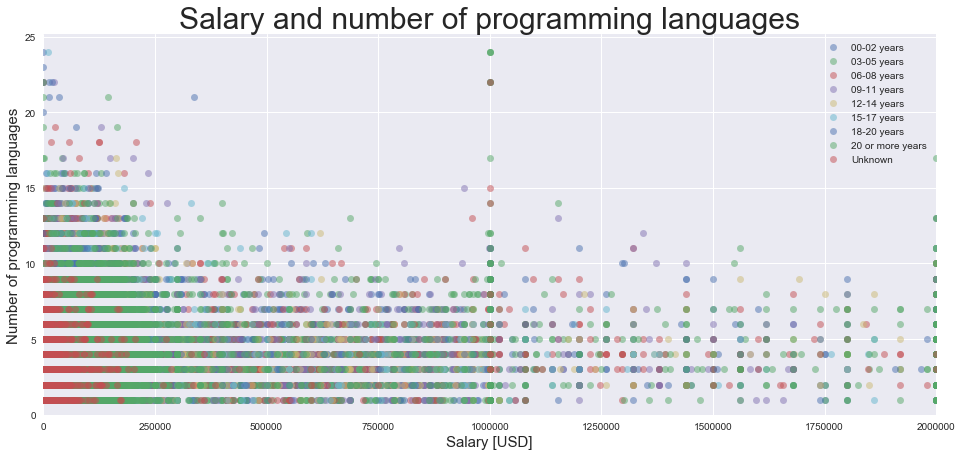

In [16]:
fig, ax = plt.subplots(figsize=(16,7))
for experiance in df_salary['YearsCodedJob'].sort_values().unique() :
    x = df_salary[(df_salary['YearsCodedJob']==experiance)]['Salary']
    y = df_salary[(df_salary['YearsCodedJob']==experiance)]['Number_of_languages']
    plt.plot(x,y,  'o', label = experiance, alpha=.5 )
plt.title('Salary and number of programming languages',fontsize=30)
plt.xlabel('Salary [USD]',fontsize=15)
plt.ylabel('Number of programming languages',fontsize=15)
plt.xlim(xmin=0, xmax=df_salary['Salary'].max())
plt.ylim(ymin=0)
plt.legend()
plt.show()